# Seminar 4.2 - Modern Digital Technologies in Text Analysis

# **3. Processing Raw Text**

In this seminar we address these questions:

1. How can we split documents up into individual words and punctuation symbols, so we can carry out the same kinds of analysis we did with text corpora in earlier seminars?
2. How can we write programs to produce formatted output and save it in a file?

## **3.1   Regular Expressions for Detecting Word Paterns**

[Regular Expression Documentation 1](https://docs.python.org/3/library/re.html)


[Regular Expression Documentation 2](https://docs.python.org/3/howto/regex.html)


Many linguistic processing tasks involve pattern matching. For example, we can find words ending with `ed` using `endswith('ed')`. Regular expressions give us a more powerful and flexible method for describing the character patterns we are interested in.


To use regular expressions in Python we need to import the `re` library using: `import re`. We also need a list of words to search. We will preprocess it to remove any proper names.

In [ ]:
import nltk
import re

wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]

In [ ]:
wordlist

### Using Basic Meta-Characters

Let's find words ending with `ed` using the regular expression «`ed$`». We will use the `re.search(p, s)` function to check whether the pattern `p` can be found somewhere inside the string `s`. We need to specify the characters of interest, and use the dollar sign which has a special behavior in the context of regular expressions in that it matches the end of the word:

In [ ]:
[w for w in wordlist if re.search('ed$', w)]

The `.` symbol matches any single character. Suppose we have room in a crossword puzzle for an 8-letter word with `j` as its third letter and `t` as its sixth letter. In place of each blank cell we use a period:

In [ ]:
[w for w in wordlist if re.search('^..j..t..$', w)]

**Point:** The caret symbol `^` matches the start of a string, just like the `$` matches the end.

Finally, the `?` symbol specifies that the previous character is optional. Thus «`^e-?mail$`» will match both email and e-mail

### Ranges and Closures

The T9 system is used for entering text on mobile phones. Two or more words that are entered with the same sequence of keystrokes are known as **textonyms**. What other words could be produced with the same sequence? Here we use the regular expression «`^[ghi] [mno] [jlk] [def]$`»:

In [ ]:
[w for w in wordlist if re.search('^[ghi][mno][jlk][def]$', w)]

The first part of the expression, «`^[ghi]`», matches the start of a word followed by g, h, or i.

The next part of the expression, «`[mno]`», constrains the second character to be m, n, or o.

The third and fourth characters are also constrained.

Only four words satisfy all these constraints. Note that the order of characters inside the square brackets is not significant, so we could have written «`^[hig] [nom] [ljk] [fed]`$» and matched the same words.

- Let's explore the `+` symbol a bit further. Notice that it can be applied to individual letters, or to bracketed sets of letters:

In [ ]:
chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))

[w for w in chat_words if re.search('^m+i+n+e+$', w)]

In [ ]:
[w for w in chat_words if re.search('^[ha]+$', w)]

Here are some more examples of regular expressions being used to find tokens that match a particular pattern, illustrating the use of some new symbols: `\`, `{}`, `()`, and `|`:

In [ ]:
wsj = sorted(set(nltk.corpus.treebank.words()))

[w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]

In [ ]:
[w for w in wsj if re.search('^[A-Z]+\$$', w)]

In [ ]:
# {4} means the length of the digits
[w for w in wsj if re.search('^[0-9]{4}$', w)]

In [ ]:
# {3, 5} means the length from 3 to 5
[w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]

In [ ]:
# {5,} means from the length 5 to higher
# {,6} means maximum length is 6

[w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]

In [ ]:
# End of the word should be ed or ing

[w for w in wsj if re.search('(ed|ing)$', w)]

You probably worked out that a backslash means that the following character is deprived of its special powers and must literally match a specific character in the word.

Thus, while `.` is special, `\.` only matches a period. 

The braced expressions, like `{3,5}`, specify the number of repeats of the previous item.

The pipe character indicates a choice between the material on its left or its right.

Parentheses indicate the scope of an operator: they can be used together with the pipe (or disjunction) symbol like this: «`w(i|e|ai|oo)t`», matching `wit`, `wet`, `wait`, and `woot`. It is instructive to see what happens when you omit the parentheses from the last expression above, and search for «`ed |ing$`».


- Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

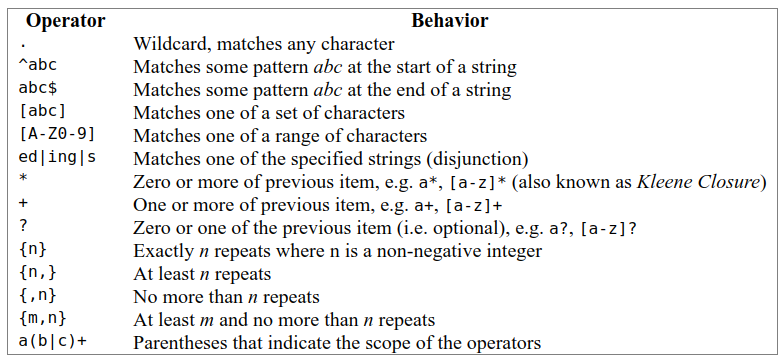

To the Python interpreter, a regular expression is just like any other string. 

If the string contains a backslash followed by particular characters, it will interpret these specially. For example `\b` would be interpreted as the backspace character. 

In general, when using regular expressions containing backslash, we should instruct the interpreter not to look inside the string at all, but simply to pass it directly to the `re` library for processing. We do this by prefixing the string with the letter `r`, to indicate that it is a raw string.

For example, the raw string `r'\band\b'` contains two `\b` symbols that are interpreted by the `re` library as matching word boundaries instead of backspace characters. If you get into the habit of using `r'...'` for regular expressions — as we will do from now on — you will avoid having to think about these complications.

## 3.2 Useful Applications of Regular Expressions

The above examples all involved searching for words `w` that match some regular expression `regexp` using `re.search(regexp, w)`. Apart from checking if a regular expression matches a word, we can use regular expressions to extract material from words, or to modify words in specific ways.

### Extracting Word Pieces

The `re.findall()` ("find all") method finds all (non-overlapping) matches of the given regular expression. Let's find all the vowels in a word, then count them:

In [ ]:
word = 'supersdkjhfsidufhgiweuhrfiseugf'

print(re.findall(r'[aeiou]', word))

print(f"\nLength: {len(re.findall(r'[aeiou]', word))}")

- Let's look for all sequences of two or more vowels in some text, and determine their relative frequency:

In [ ]:
wsj = sorted(set(nltk.corpus.treebank.words()))

fd = nltk.FreqDist(vs for word in wsj
                      for vs in re.findall(r'[aeiou]{2,}', word))

fd.most_common(20)

### Finding Word Stems

When we use a web search engine, we usually don't mind (or even notice) if the words in the document differ from our search terms in having different endings.

A query for laptops finds documents containing laptop and vice versa. Indeed, `laptop` and `laptops` are just two forms of the same dictionary word (or lemma). 

For some language processing tasks we want to ignore word endings, and just deal with word stems.

There are various ways we can pull out the stem of a word. Here's a simple-minded approach which just strips off anything that looks like a suffix:

In [ ]:
def stem(word):
    for suffix in ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', 'ment']:
        if word.endswith(suffix):
            return word[:-len(suffix)]
    return word

stem('laptops')

Although we will ultimately use NLTK's built-in stemmers, it's interesting to see how we can use regular expressions for this task. 

Our first step is to build up a disjunction of all the suffixes. We need to enclose it in parentheses in order to limit the scope of the disjunction.

In [ ]:
re.findall(r'^.*(ing|ly|ed|ious|ies|ive|es|s|ment)', 'processing')

Here, `re.findall()` just gave us the `suffix` even though the regular expression matched the entire word. 

This is because the parentheses have a second function, to select substrings to be extracted. 

If we want to use the parentheses to specify the scope of the disjunction, but not to select the material to be output, we have to add `?:`, which is just one of many arcane subtleties of regular expressions. Here's the revised version.

In [ ]:
re.findall(r'^.*(?:ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

However, we'd actually like to split the word into `stem` and `suffix`. So we should just parenthesize both parts of the regular expression:

In [ ]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

This looks promising, but still has a problem. Let's look at a different word, `processes`:

In [ ]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')

The regular expression incorrectly found an -s suffix instead of an -es suffix.

This demonstrates another subtlety: the star operator is "greedy" and the `.*` part of the expression tries to consume as much of the input as possible. If we use the "non-greedy" version of the star operator, written `*?`, we get what we want:

In [ ]:
re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')

This works even when we allow an empty suffix, by making the content of the second parentheses optional:

In [ ]:
re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'language')

This approach still has many problems (can you spot them?)

But we will move on to define a function to perform stemming, and apply it to a whole text:

In [ ]:
from nltk import word_tokenize

In [ ]:
def stem(word):
    regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
    stem, suffix = re.findall(regexp, word)[0]
    return stem

raw = """DENNIS: Listen, strange women lying in ponds distributing swords is no 
basis for a system of government.  Supreme executive power derives from 
a mandate from the masses, not from some farcical aquatic ceremony."""

tokens = word_tokenize(raw)

print([stem(t) for t in tokens])

Notice that our regular expression removed the `s` from `ponds` but also from `is` and `basis`. It produced some non-words like distribut and deriv, but these are acceptable stems in some applications.

### Searching Tokenized Text

You can use a special kind of regular expression for searching across multiple words in a text (where a text is a list of tokens). For example, "`\<a> \<man>`" finds all instances of `a man` in the text. 

The angle brackets are used to mark token boundaries, and any whitespace between the angle brackets is ignored (behaviors that are unique to NLTK's `findall()` method for texts). 
    

In the following example, we include `<.*>` which will match any single token, and enclose it in parentheses so only the matched word (e.g. `monied`) and not the matched phrase (e.g. `a monied man`) is produced. 

The second example finds three-word phrases ending with the word `bro`.

The last example finds sequences of three or more words starting with the letter `l`

In [ ]:
from nltk.corpus import gutenberg, nps_chat

moby = nltk.Text(gutenberg.words('melville-moby_dick.txt'))

# Example 1
moby.findall(r"<a> (<.*>) <man>")

In [ ]:
# Example 2
chat = nltk.Text(nps_chat.words())
chat.findall(r"<.*> <.*> <bro>")

In [ ]:
# Example 3
chat.findall(r"<l.*>{3,}")

## 3.3 Regular Expressions for Tokenizing Text

NLTK has strong tools for tokenizing text, but what if we want to do it with regular expression with more effort?

### Simple Approaches to Tokenization

The very simplest method for tokenizing text is to **split on whitespace**. Consider the following text:

In [ ]:
raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone
though), 'I won't have any pepper in my kitchen AT ALL. Soup does very
well without--Maybe it's always pepper that makes people hot-tempered,'..."""

In [ ]:
print(re.split(r' ', raw))

In [ ]:
print(re.split(r'[ \t\n]+', raw))

The regular expression «`[ \t\n]+`» matches one or more space, tab (`\t`) or newline (`\n`). 

Other whitespace characters, such as carriage-return and form-feed should really be included too. Instead, we will use a built-in `re` abbreviation, `\s`, which means any whitespace character. The above statement can be rewritten as `re.split(r'\s+', raw)`.

In [ ]:
print(re.split(r'\s+', raw))

Splitting on whitespace gives us tokens like `'(not'` and `'herself,'`. An alternative is to use the fact that Python provides us with a character class `\w` for word characters, equivalent to `[a-zA-Z0-9_]`. 

It also defines the complement of this class `\W`, i.e. all characters other than letters, digits or underscore. We can use `\W` in a simple regular expression to split the input on anything other than a word character:

In [ ]:
print(re.split(r'\W+', raw))

In [ ]:
print(re.findall(r'\w+|\S\w*', raw))

Regular Expression Symbols:

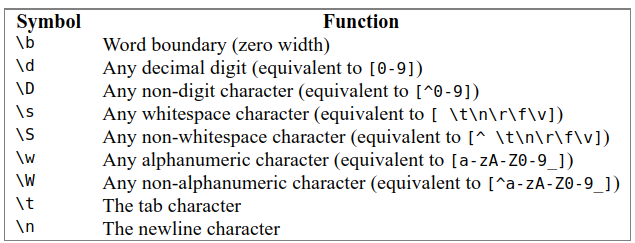